In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("Road Accident data.csv")

In [3]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [5]:
df['Carriageway_Hazards'].fillna('None', inplace=True)


In [6]:
df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0], inplace=True)
df['Time'].fillna(df['Time'].mode()[0], inplace=True)
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0], inplace=True)
df['Road_Type'].fillna(df['Road_Type'].mode()[0], inplace=True)


In [7]:
df.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [8]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,None,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,None,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,None,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,None,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


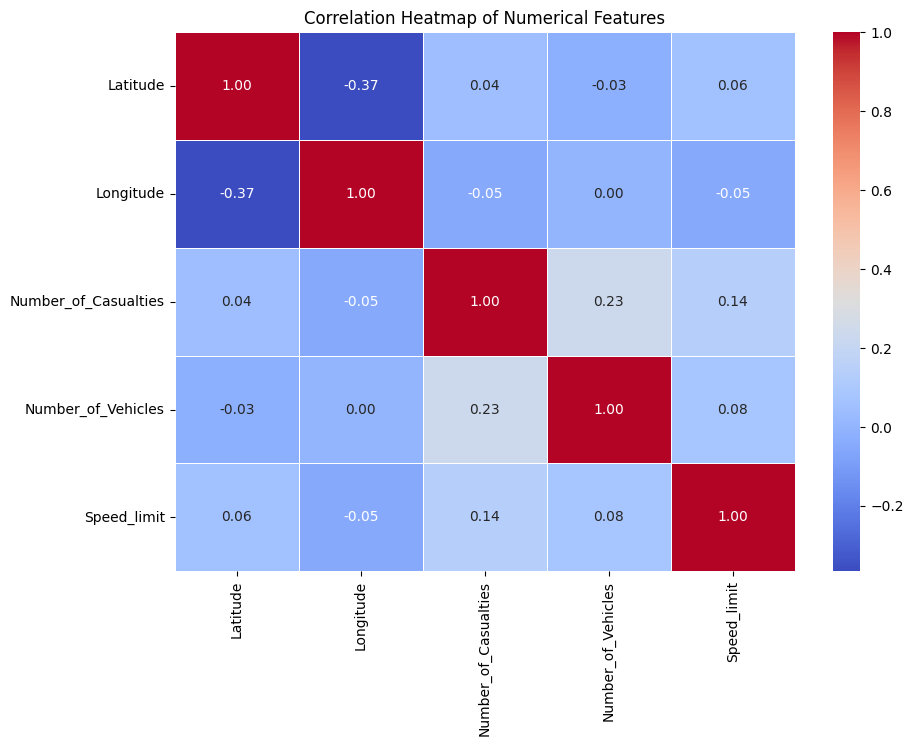

In [9]:
# 3. Correlation heatmap
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [10]:

# Select relevant features and target variable
features = ["Day_of_Week", "Junction_Control", "Junction_Detail", "Light_Conditions", 
            "Road_Surface_Conditions", "Road_Type", "Speed_limit", "Urban_or_Rural_Area", 
            "Weather_Conditions", "Number_of_Casualties", "Number_of_Vehicles"]
target = "Accident_Severity"

# Drop rows with missing values
df = df[features + [target]].dropna()

# Encode categorical variables
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Split data into training and testing sets using stratification
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred, zero_division=1)}\n")




Random Forest Accuracy: 0.84
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.06      0.01      0.01       781
           1       0.00      0.00      0.00        10
           2       0.21      0.03      0.05      8148
           3       0.86      0.98      0.92     52656

    accuracy                           0.84     61595
   macro avg       0.28      0.25      0.25     61595
weighted avg       0.76      0.84      0.79     61595


Logistic Regression Accuracy: 0.85
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.40      0.00      0.01       781
           1       1.00      0.00      0.00        10
           2       0.36      0.00      0.00      8148
           3       0.85      1.00      0.92     52656

    accuracy                           0.85     61595
   macro avg       0.65      0.25      0.23     61595
weighted avg       0.78      0.8

/var/folders/gx/bgqt1b950m173hvl0t0m6bq00000gn/T/ipykernel_8302/4193801075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="coolwarm")


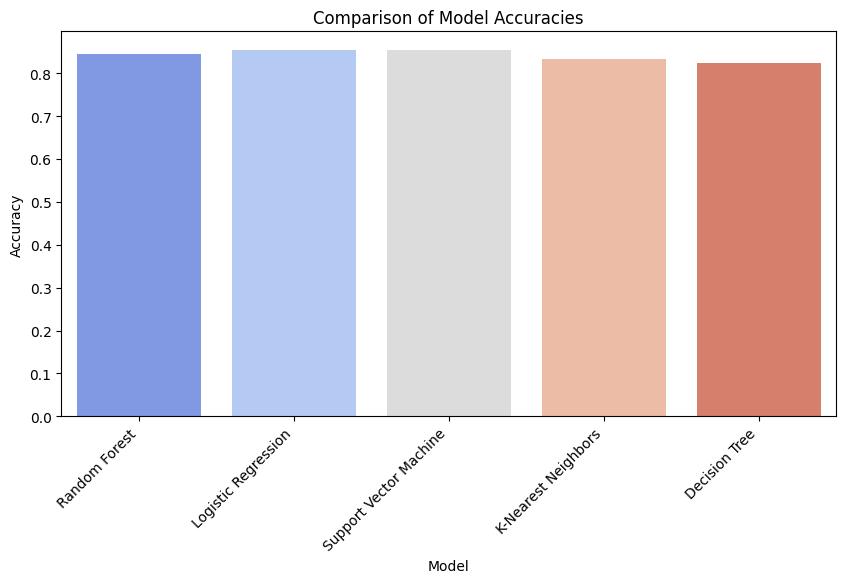

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.show()


/var/folders/gx/bgqt1b950m173hvl0t0m6bq00000gn/T/ipykernel_8302/2792241359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette="coolwarm")


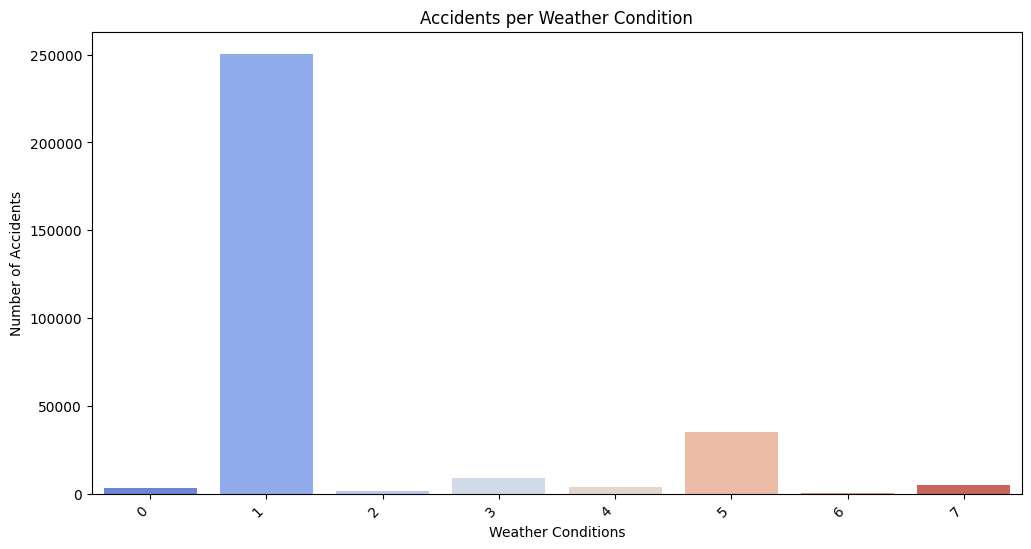

In [12]:
# Analyze accidents by weather conditions
weather_accidents = df["Weather_Conditions"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accidents per Weather Condition")
plt.show()


/var/folders/gx/bgqt1b950m173hvl0t0m6bq00000gn/T/ipykernel_8302/1835365141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_accidents.index, y=road_accidents.values, palette="viridis")


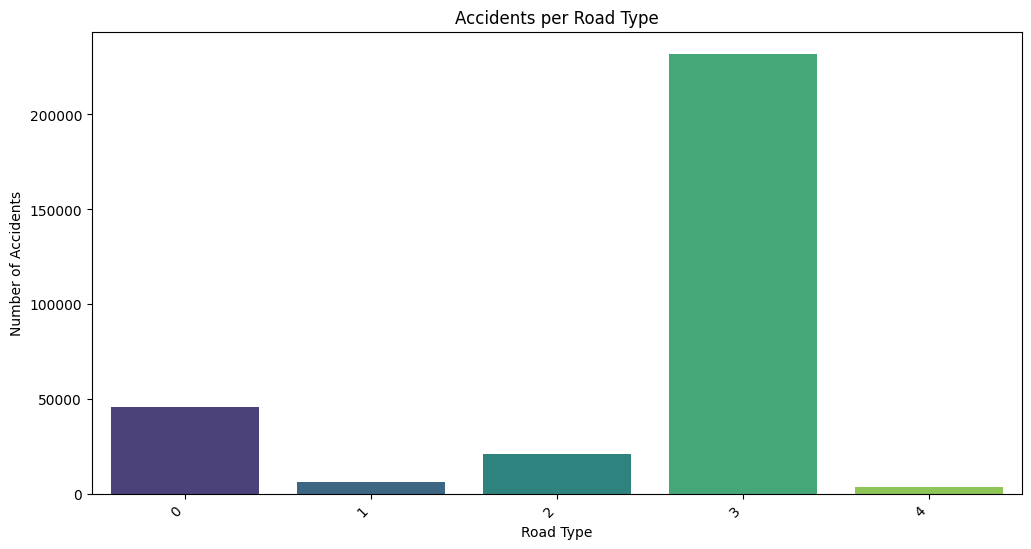

In [13]:

# Analyze accidents by road type
road_accidents = df["Road_Type"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=road_accidents.index, y=road_accidents.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.title("Accidents per Road Type")
plt.show()


In [14]:
# Identify the weather condition with the most accidents
most_accident_weather = weather_accidents.idxmax()
most_accidents_count = weather_accidents.max()
print(f"Weather condition with most accidents: {most_accident_weather} ({most_accidents_count} accidents)")

Weather condition with most accidents: 1 (250553 accidents)


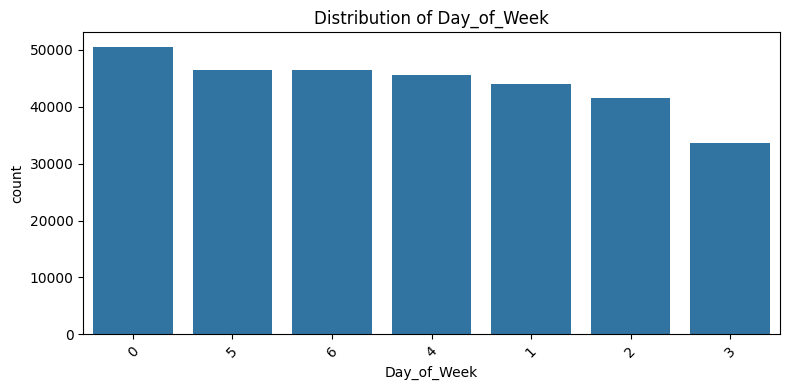

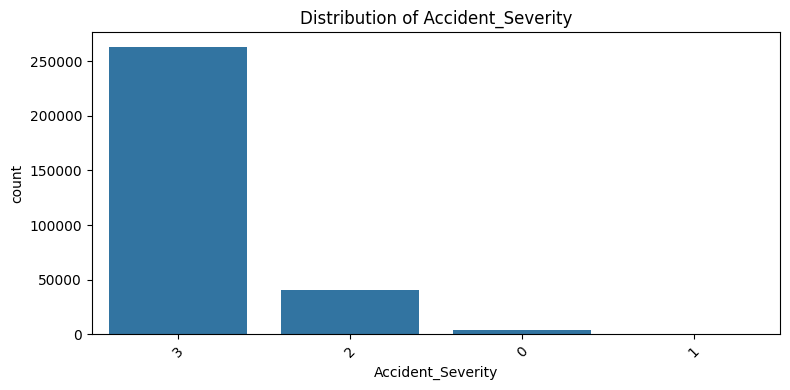

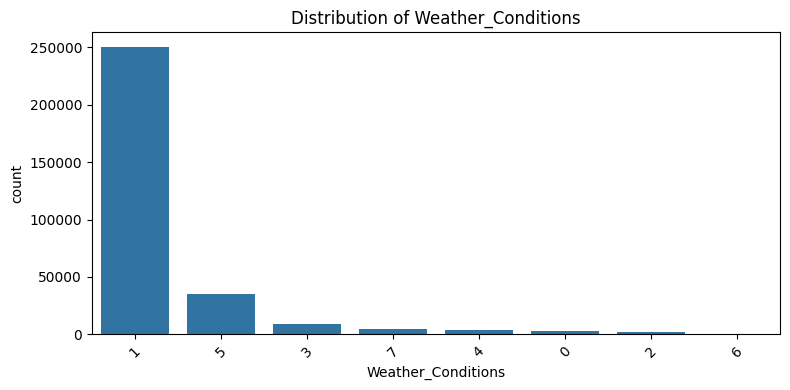

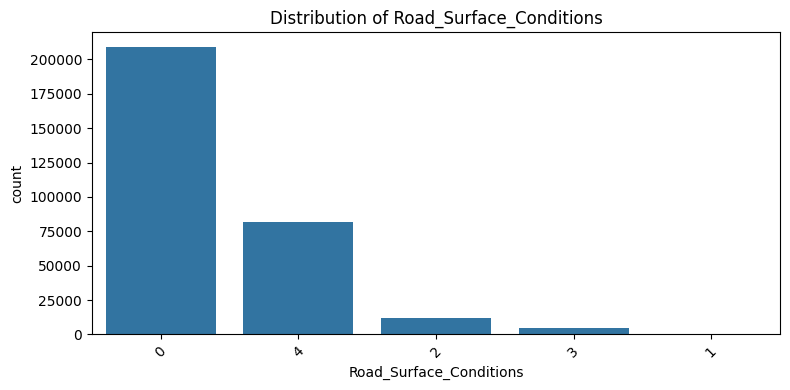

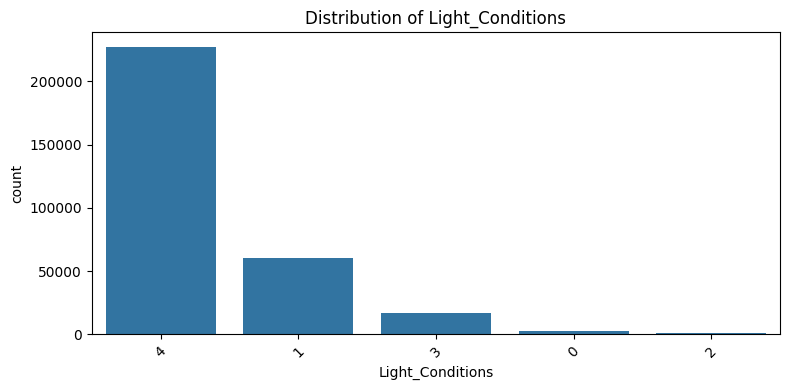

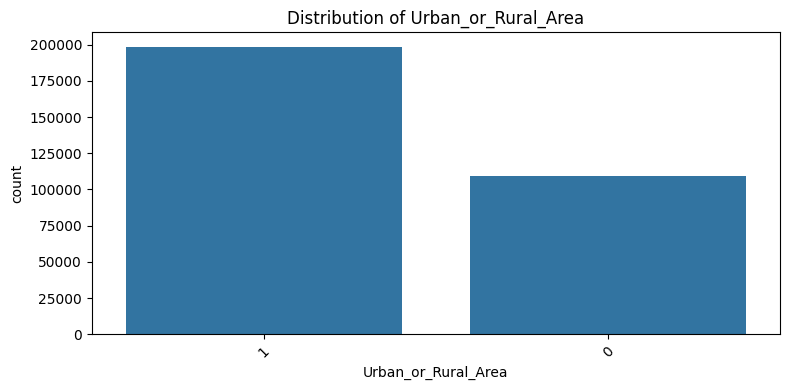

In [15]:

# Enhanced Exploratory Data Analysis (EDA)


# 1. Bar charts for top features
top_cats = ['Day_of_Week', 'Accident_Severity', 'Weather_Conditions', 
            'Road_Surface_Conditions', 'Light_Conditions', 'Urban_or_Rural_Area']

for col in top_cats:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()




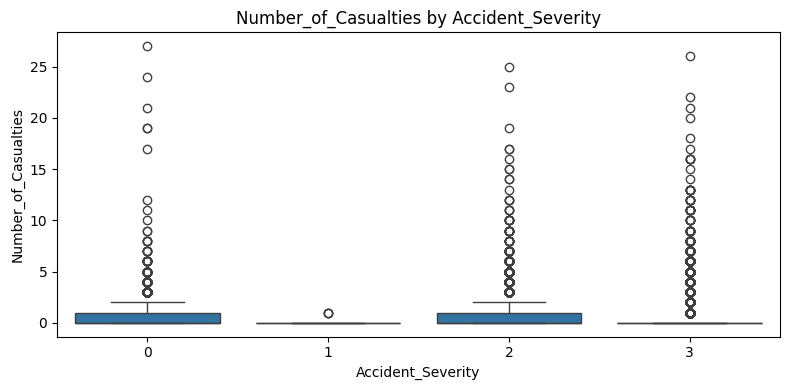

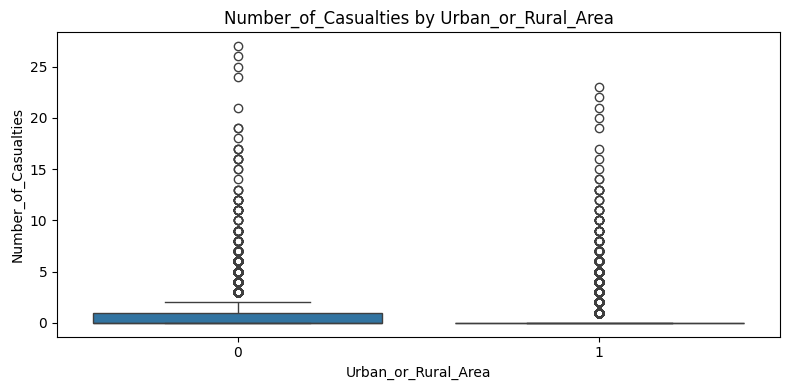

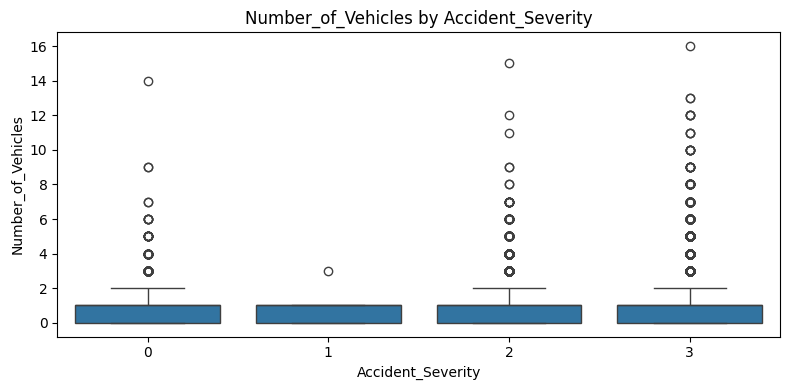

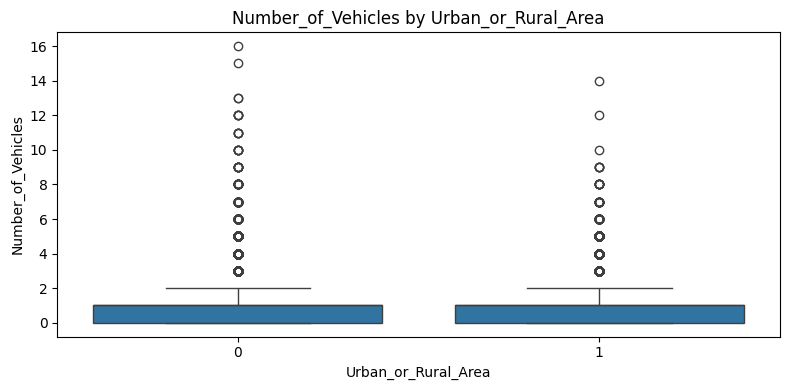

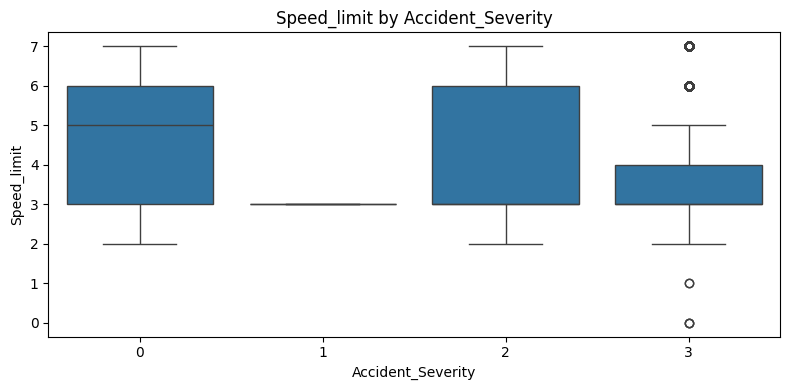

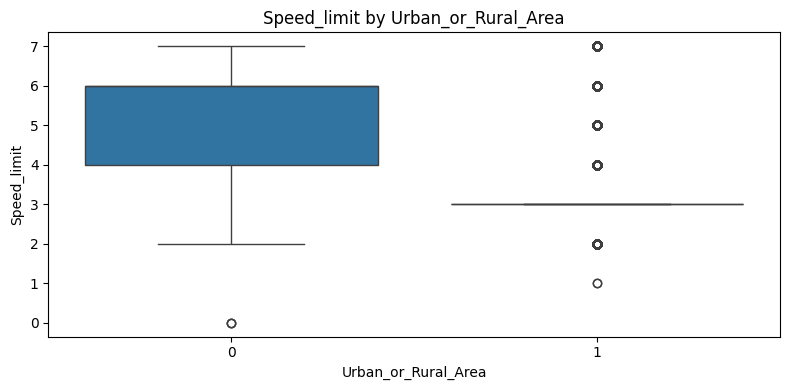

In [16]:
# 2. Boxplots: numerical vs categorical
numeric_cols = ['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']
group_by = ['Accident_Severity', 'Urban_or_Rural_Area']

for num in numeric_cols:
    for grp in group_by:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=grp, y=num)
        plt.title(f"{num} by {grp}")
        plt.tight_layout()
        plt.show()



In [18]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



Random Forest
Training Accuracy: 87.78%
Test Accuracy: 84.43%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.06      0.01      0.01       781
           1       0.00      0.00      0.00        10
           2       0.21      0.03      0.05      8148
           3       0.86      0.98      0.92     52656

    accuracy                           0.84     61595
   macro avg       0.28      0.25      0.25     61595
weighted avg       0.76      0.84      0.79     61595


Gradient Boosting
Training Accuracy: 85.51%
Test Accuracy: 85.50%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       781
           1       0.00      0.00      0.00        10
           2       0.50      0.00      0.00      8148
           3       0.86      1.00      0.92     52656

    accuracy                           0.85     61595
   macro avg       0.34      0.25      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Training Accuracy: 85.54%
Test Accuracy: 85.46%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       781
           1       0.00      0.00      0.00        10
           2       0.33      0.00      0.01      8148
           3       0.86      1.00      0.92     52656

    accuracy                           0.85     61595
   macro avg       0.30      0.25      0.23     61595
weighted avg       0.77      0.85      0.79     61595



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

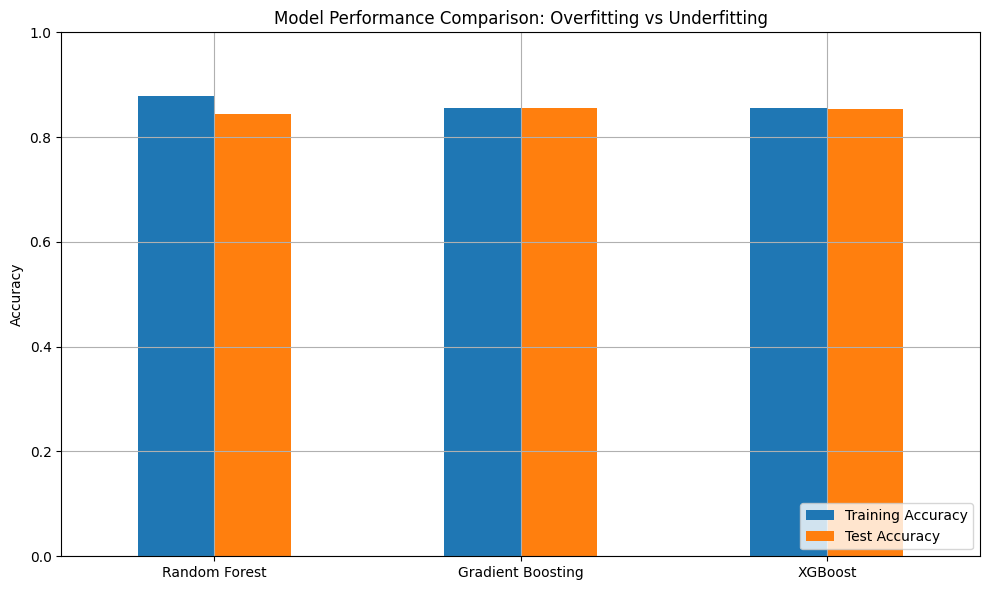

In [17]:
# ------------------ Ensemble Methods: Random Forest, Gradient Boosting, XGBoost ------------------

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n{'='*30}\n{name}\n{'='*30}")
    
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results[name] = {
        "Training Accuracy": train_acc,
        "Test Accuracy": test_acc
    }

    # Reports
    print("Training Accuracy: {:.2f}%".format(train_acc * 100))
    print("Test Accuracy: {:.2f}%".format(test_acc * 100))
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

# ------------------ Accuracy Comparison Plot ------------------

# Create accuracy dataframe
import pandas as pd

acc_df = pd.DataFrame(results).T  # Transpose to get models as rows
acc_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison: Overfitting vs Underfitting")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
